# Определение перспективного тарифа для телеком-компании

Клиентам предлагаются два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо провести предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Требуется проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта. 

Примем, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

**Цель исследования** - Для корректировки рекламного бюджета определить какой тариф приносит больше денег(«Смарт» или «Ультра»). 

Проверить две гипотезы:
* средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
* средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


**Ход исследования**

Данные для исследования мы получим пятью файлами:
* /datasets/calls.csv. - информация о звонках;
* /datasets/internet.csv. - информация об интернет-сессиях;
* /datasets/messages.csv. - информация о сообщениях;
* /datasets/tariffs.csv. - информация о тарифах;
* /datasets/users.csv. - информация о пользователях.

Потребуется объединить разрозненную информацию в единый блок данных.

Исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Обработка данных.
 3. Исследовательский анализ данных.
 4. Проверка гипотез.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
users_df = pd.read_csv('C:/IT Data analytic/Data Jupyter/04 Статистический анализ данных/users.csv')
calls_df = pd.read_csv('C:/IT Data analytic/Data Jupyter/04 Статистический анализ данных/calls.csv')
messages_df = pd.read_csv('C:/IT Data analytic/Data Jupyter/04 Статистический анализ данных/messages.csv')
internet_df = pd.read_csv('C:/IT Data analytic/Data Jupyter/04 Статистический анализ данных/internet.csv')
tariffs_df = pd.read_csv('C:/IT Data analytic/Data Jupyter/04 Статистический анализ данных/tariffs.csv')

**Таблица users (информация о пользователях):**

In [3]:
users_df.info()
display(users_df.head())
display('Наименование столбцов')
display(users_df.columns)
display(users_df.describe())
display('Инофрмация о пропусках')
display(users_df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(users_df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


'Наименование столбцов'

Index(['user_id', 'age', 'churn_date', 'city', 'first_name', 'last_name',
       'reg_date', 'tariff'],
      dtype='object')

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


'Инофрмация о пропусках'

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

'Инофрмация о долях пропущенных значений'

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

Согласно документации к данным:

* user_id — уникальный идентификатор пользователя
* first_name — имя пользователя
* last_name — фамилия пользователя
* age — возраст пользователя (годы)
* reg_date — дата подключения тарифа (день, месяц, год)
* churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
* city — город проживания пользователя
* tariff — название тарифного плана

**Таблица calls (информация о звонках):**

In [4]:
calls_df.info()
display(calls_df.head())
display('Наименование столбцов')
display(calls_df.columns)
display(calls_df.describe())
display('Инофрмация о пропусках')
display(calls_df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(calls_df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


'Наименование столбцов'

Index(['id', 'call_date', 'duration', 'user_id'], dtype='object')

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


'Инофрмация о пропусках'

id           0
call_date    0
duration     0
user_id      0
dtype: int64

'Инофрмация о долях пропущенных значений'

id           0.0
call_date    0.0
duration     0.0
user_id      0.0
dtype: float64

Согласно документации к данным:

* id — уникальный номер звонка
* call_date — дата звонка
* duration — длительность звонка в минутах
* user_id — идентификатор пользователя, сделавшего звонок

**Таблица messages (информация о сообщениях):**

In [5]:
messages_df.info()
display(messages_df.head())
display('Наименование столбцов')
display(messages_df.columns)
display(messages_df.describe())
display('Инофрмация о пропусках')
display(messages_df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(messages_df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


'Наименование столбцов'

Index(['id', 'message_date', 'user_id'], dtype='object')

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


'Инофрмация о пропусках'

id              0
message_date    0
user_id         0
dtype: int64

'Инофрмация о долях пропущенных значений'

id              0.0
message_date    0.0
user_id         0.0
dtype: float64

Согласно документации к данным:

* id — уникальный номер сообщения
* message_date — дата сообщения
* user_id — идентификатор пользователя, отправившего сообщение

**Таблица internet (информация об интернет-сессиях):**

In [6]:
internet_df.info()
display(internet_df.head())
display('Наименование столбцов')
display(internet_df.columns)
display(internet_df.describe())
display('Инофрмация о пропусках')
display(internet_df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(internet_df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


'Наименование столбцов'

Index(['Unnamed: 0', 'id', 'mb_used', 'session_date', 'user_id'], dtype='object')

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


'Инофрмация о пропусках'

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

'Инофрмация о долях пропущенных значений'

Unnamed: 0      0.0
id              0.0
mb_used         0.0
session_date    0.0
user_id         0.0
dtype: float64

Согласно документации к данным:

* id — уникальный номер сессии
* mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
* session_date — дата интернет-сессии
* user_id — идентификатор пользователя

**Таблица tariffs (информация о тарифах):**

In [7]:
tariffs_df.info()
display(tariffs_df.head())
display('Наименование столбцов')
display(tariffs_df.columns)
display(tariffs_df.describe())
display('Инофрмация о пропусках')
display(tariffs_df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(tariffs_df.isna().mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


'Наименование столбцов'

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


'Инофрмация о пропусках'

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

'Инофрмация о долях пропущенных значений'

messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
rub_monthly_fee          0.0
rub_per_gb               0.0
rub_per_message          0.0
rub_per_minute           0.0
tariff_name              0.0
dtype: float64

Согласно документации к данным:

* tariff_name — название тарифа
* rub_monthly_fee — ежемесячная абонентская плата в рублях
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
* messages_included — количество сообщений в месяц, включённых в абонентскую плату
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)

## Обработка данных

### Анализ пропусков

В таблицах calls (информация о звонках), messages (информация о сообщениях), internet (информация об интернет-сессиях), tariffs (информация о тарифах) отсутствуют пропуски.

#### Анализ пропусков таблицы users (информация о пользователях)

In [8]:
display('Инофрмация о пропусках')
display(users_df.isna().sum())
display('Инофрмация о долях пропущенных значений')
display(users_df.isna().mean())

'Инофрмация о пропусках'

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

'Инофрмация о долях пропущенных значений'

user_id       0.000
age           0.000
churn_date    0.924
city          0.000
first_name    0.000
last_name     0.000
reg_date      0.000
tariff        0.000
dtype: float64

In [9]:
users_df.dropna().head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart


#### Вывод

В таблице churn_date — дата прекращения пользования тарифом. В соответствии с документацией если значение пропущено, то тариф ещё действовал на момент выгрузки данных. 

462 пользователя из 500 (или 92.4%) продолжают пользоваться услугами связи. Пропуск не является отсутствием значения. 

### Изменение и добавление данных

#### Приведение столбцов с указанием времени к формату datetime

In [10]:
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format= '%Y-%m-%dT%')
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], format= '%Y-%m-%dT%')
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format= '%Y-%m-%dT%')
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format= '%Y-%m-%dT%')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format= '%Y-%m-%dT%')

In [11]:
display(users_df.head())
print(users_df['reg_date'].dtypes)
print(users_df['churn_date'].dtypes)
display(calls_df.head())
print(calls_df['call_date'].dtypes)
display(messages_df.head())
print(messages_df['message_date'].dtypes)
display(internet_df.head())
print(internet_df['session_date'].dtypes)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


datetime64[ns]
datetime64[ns]


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


datetime64[ns]


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


datetime64[ns]


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


datetime64[ns]


#### Добавление в таблицу users_df дополнительных столбцов с указанием месяца прекращения оказания услуг (churn_month) и месяцев использования.

Для дальнейшего обединения данных формируем основу 500 клиентов на 12 месяцев - всего в таблице будет 6000 строк. Данные будут добавлятся к этой таблице из других таблиц для окончательного расчета.

In [12]:
month_use = pd.DataFrame({'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]})
users_df = users_df.merge(month_use, how='cross')
users_df['churn_month'] = pd.DatetimeIndex(users_df['churn_date']).month
users_df = users_df.drop(['churn_date'], axis = 1)
users_df['reg_month'] = pd.DatetimeIndex(users_df['reg_date']).month
users_df = users_df.drop(['reg_date'], axis = 1)
users_df = users_df.fillna(0)
users_df.head(36)

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,1,0.0,5
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,2,0.0,5
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,3,0.0,5
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,4,0.0,5
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5
5,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5
6,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5
7,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5
8,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5
9,1000,52,Краснодар,Рафаил,Верещагин,ultra,10,0.0,5


#### Добавление в таблицы calls_df, messages_df и internet_df дополнительных столбецов с указанием месяца оказания услуг (month)

In [13]:
calls_df['month'] = pd.DatetimeIndex(calls_df['call_date']).month
messages_df['month'] = pd.DatetimeIndex(messages_df['message_date']).month
internet_df['month'] = pd.DatetimeIndex(internet_df['session_date']).month

In [14]:
display(calls_df.head())
display(messages_df.head())
display(internet_df.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


#### Округление секунд до минут и перевод мегабайтов в гигабайты

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Примем, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

In [15]:
calls_df['duration'] = np.ceil(calls_df['duration'])

In [16]:
internet_df['gb_used'] = (internet_df['mb_used'] / 1024)

In [17]:
tariffs_df['mb_per_month_included'] = (tariffs_df['mb_per_month_included'] / 1024)
tariffs_df.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)

In [18]:
display(calls_df.head())
display(internet_df.head())
display(tariffs_df.head())

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112.95,2018-11-25,1000,11,0.110303
1,1,1000_1,1052.81,2018-09-07,1000,9,1.028135
2,2,1000_2,1197.26,2018-06-25,1000,6,1.169199
3,3,1000_3,550.27,2018-08-22,1000,8,0.537373
4,4,1000_4,302.56,2018-09-24,1000,9,0.295469


,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


#### Вывод

В таблице users_df:
- столбцы reg_date и churn_date приведены к формату datetime
- добавлен столбец churn_month и month и reg_month

В таблице calls_df:
- столбец call_date приведен к формату datetime
- добавлен столбец month
- секунды округлены до минут столбец duration

В таблице messages_df:
- столбец message_date приведен к формату datetime
- добавлен столбец month

В таблице internet_df:
- столбец session_date приведен к формату datetime
- добавлен столбец month
- переведены мегабайты в гигабайты - добавлен столбец gb_used

В таблице tariffs_df:
- переведены мегабайты в гигабайты - переименнован столбец

### Удаление дубликатов.

In [19]:
'Полные дубликаты'
display(users_df.duplicated().sum())
display(calls_df.duplicated().sum())
display(messages_df.duplicated().sum())
display(internet_df.duplicated().sum())
display(tariffs_df.duplicated().sum())

0

0

0

0

0

В таблицах отсутствуют полные дубликаты.

Проверять на неявные дубликаты целесообразно только столбцы с типом данных object.

In [20]:
display(users_df.dtypes)
display(calls_df.dtypes)
display(messages_df.dtypes)
display(internet_df.dtypes)
display(tariffs_df.dtypes)

user_id          int64
age              int64
city            object
first_name      object
last_name       object
tariff          object
month            int64
churn_month    float64
reg_month        int64
dtype: object

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
month                 int64
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
month                    int64
dtype: object

Unnamed: 0               int64
id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
month                    int64
gb_used                float64
dtype: object

messages_included          int64
gb_per_month_included    float64
minutes_included           int64
rub_monthly_fee            int64
rub_per_gb                 int64
rub_per_message            int64
rub_per_minute             int64
tariff_name               object
dtype: object

**Таблица users (информация о пользователях)**

In [21]:
print(users_df.sort_values(by='city')['city'].unique())
users_df['city'].nunique()

['Архангельск' 'Астрахань' 'Балашиха' 'Барнаул' 'Белгород' 'Брянск'
 'Владивосток' 'Владикавказ' 'Владимир' 'Волгоград' 'Волжский' 'Вологда'
 'Воронеж' 'Грозный' 'Екатеринбург' 'Иваново' 'Ижевск' 'Иркутск' 'Казань'
 'Калининград' 'Калуга' 'Кемерово' 'Киров' 'Кострома' 'Краснодар'
 'Красноярск' 'Курган' 'Курск' 'Липецк' 'Магнитогорск' 'Махачкала'
 'Москва' 'Мурманск' 'Набережные Челны' 'Нижневартовск' 'Нижний Новгород'
 'Нижний Тагил' 'Новокузнецк' 'Новороссийск' 'Новосибирск' 'Омск'
 'Оренбург' 'Орёл' 'Пенза' 'Пермь' 'Петрозаводск' 'Подольск'
 'Ростов-на-Дону' 'Рязань' 'Самара' 'Санкт-Петербург' 'Саранск' 'Саратов'
 'Севастополь' 'Смоленск' 'Сочи' 'Ставрополь' 'Стерлитамак' 'Сургут'
 'Тамбов' 'Тверь' 'Тольятти' 'Томск' 'Тула' 'Тюмень' 'Улан-Удэ'
 'Ульяновск' 'Уфа' 'Хабаровск' 'Химки' 'Чебоксары' 'Челябинск' 'Череповец'
 'Чита' 'Якутск' 'Ярославль']


76

In [22]:
print(users_df.sort_values(by='tariff')['tariff'].unique())
users_df['tariff'].nunique()

['smart' 'ultra']


2

Столбцы first_name — имя пользователя и last_name — фамилия пользователя не могут являться дубликатами. Неявные дубликаты в таблице отсутствуют.

**Таблица calls (информация о звонках)**

In [23]:
print(calls_df.sort_values(by='id')['id'].unique())
calls_df['id'].nunique()

['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']


202607

id — уникальный номер звонка. Неявные дубликаты отсутствуют.

**Таблица messages (информация о сообщениях)**

In [24]:
print(messages_df.sort_values(by='id')['id'].unique())
messages_df['id'].nunique()

['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']


123036

id — уникальный номер сообщения. Неявные дубликаты отсутствуют.

**Таблица internet (информация об интернет-сессиях)**

In [25]:
print(internet_df.sort_values(by='id')['id'].unique())
internet_df['id'].nunique()

['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']


149396

id — уникальный номер сессии. Неявные дубликаты отсутствуют.

**Таблица tariffs (информация о тарифах)**

In [26]:
print(tariffs_df.sort_values(by='tariff_name')['tariff_name'].unique())
tariffs_df['tariff_name'].nunique()

['smart' 'ultra']


2

Неявные дубликаты отсутствуют.

#### Вывод

В таблицах отсутствуют полные и неявные дубликаты.

### Проведение расчетов по каждому пользователю

#### Количество сделанных звонков и израсходованных минут разговора по месяцам

In [27]:
calls_df.head(15)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12
5,1000_5,2018-11-02,0.0,1000,11
6,1000_6,2018-10-18,0.0,1000,10
7,1000_7,2018-08-22,19.0,1000,8
8,1000_8,2018-09-15,19.0,1000,9
9,1000_9,2018-08-15,0.0,1000,8


In [28]:
calls_user = calls_df.groupby(['user_id', 'month']).sum().reset_index()
calls_user.head(15)

,user_id,month,duration
0,1000,5,159.0
1,1000,6,172.0
2,1000,7,340.0
3,1000,8,408.0
4,1000,9,466.0
5,1000,10,350.0
6,1000,11,338.0
7,1000,12,333.0
8,1001,11,430.0
9,1001,12,414.0


#### Количество отправленных сообщений по месяцам

In [29]:
messages_df.head(15)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
5,1000_5,2018-06-20,1000,6
6,1000_6,2018-11-19,1000,11
7,1000_7,2018-10-29,1000,10
8,1000_8,2018-06-25,1000,6
9,1000_9,2018-12-18,1000,12


In [30]:
messages_user = messages_df.groupby(['user_id', 'month']).count().reset_index()
messages_user.rename(columns={'message_date': 'message_count'}, inplace=True)
messages_user = messages_user.drop(['id'], axis = 1)
messages_user.head(15)

,user_id,month,message_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
5,1000,10,73
6,1000,11,58
7,1000,12,70
8,1002,6,4
9,1002,7,11


#### Объем израсходованного интернет-трафика по месяцам

In [31]:
internet_df.head(15)

,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112.95,2018-11-25,1000,11,0.110303
1,1,1000_1,1052.81,2018-09-07,1000,9,1.028135
2,2,1000_2,1197.26,2018-06-25,1000,6,1.169199
3,3,1000_3,550.27,2018-08-22,1000,8,0.537373
4,4,1000_4,302.56,2018-09-24,1000,9,0.295469
5,5,1000_5,399.97,2018-10-02,1000,10,0.390596
6,6,1000_6,540.08,2018-09-07,1000,9,0.527422
7,7,1000_7,415.70,2018-07-11,1000,7,0.405957
8,8,1000_8,505.40,2018-10-08,1000,10,0.493555
9,9,1000_9,345.54,2018-09-03,1000,9,0.337441


«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.

Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Примем, что неиспользованные за предыдущий месяц звонки, смс, интернет на следующий месяц не переносятся.

In [32]:
internet_user = internet_df.groupby(['user_id', 'month']).sum().reset_index()
internet_user['gb_used'] = np.ceil(internet_user['gb_used'])
internet_user = internet_user.drop(['Unnamed: 0', 'mb_used'], axis = 1)
internet_user.head(15)

,user_id,month,gb_used
0,1000,5,3.0
1,1000,6,23.0
2,1000,7,14.0
3,1000,8,14.0
4,1000,9,15.0
5,1000,10,15.0
6,1000,11,15.0
7,1000,12,10.0
8,1001,11,18.0
9,1001,12,14.0


#### Помесячная выручка

In [33]:
display(users_df.head())
tariffs_df.rename(columns={'tariff_name': 'tariff'}, inplace=True)
display(tariffs_df.head())

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,1,0.0,5
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,2,0.0,5
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,3,0.0,5
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,4,0.0,5
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5


,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


Меняем название столбца tariff_name на tariff для возможности объединения таблиц.

In [34]:
total_df = users_df.merge(tariffs_df, on ='tariff', how ='left')
total_df

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,1,0.0,5,1000,30.0,3000,1950,150,1,1
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,2,0.0,5,1000,30.0,3000,1950,150,1,1
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,3,0.0,5,1000,30.0,3000,1950,150,1,1
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,4,0.0,5,1000,30.0,3000,1950,150,1,1
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,Пермь,Гектор,Корнилов,smart,8,0.0,9,50,15.0,500,550,200,3,3
5996,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3
5997,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3
5998,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3


Объеденяем таблицы calls_user, messages_user и internet_user по столбцу user_id и month.

In [35]:
total_use = calls_user.merge(messages_user, on =['user_id', 'month' ], how ='left')
total_use = total_use.merge(internet_user, on =['user_id', 'month' ], how ='left')
total_use

,user_id,month,duration,message_count,gb_used
0,1000,5,159.0,22.0,3.0
1,1000,6,172.0,60.0,23.0
2,1000,7,340.0,75.0,14.0
3,1000,8,408.0,81.0,14.0
4,1000,9,466.0,57.0,15.0
...,...,...,...,...,...
3169,1498,10,247.0,42.0,21.0
3170,1499,9,70.0,11.0,2.0
3171,1499,10,449.0,48.0,18.0
3172,1499,11,612.0,59.0,18.0


Объеденяем таблицы total_df и total_use по столбцу user_id и month.

In [36]:
total_df = total_df.merge(total_use, on =['user_id', 'month' ], how ='left')
total_df = total_df.fillna(0)
total_df

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,1,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,2,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,3,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,4,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,Пермь,Гектор,Корнилов,smart,8,0.0,9,50,15.0,500,550,200,3,3,0.0,0.0,0.0
5996,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3,70.0,11.0,2.0
5997,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3,449.0,48.0,18.0
5998,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3,612.0,59.0,18.0


Выводим выручку от абонентской платы.

In [37]:
total_df.loc[(total_df['churn_month'] == 0)
             & (total_df['reg_month'] <= total_df['month']),
             'user_charges'] = total_df['rub_monthly_fee'] 

In [38]:
total_df.loc[(total_df['reg_month'] <= total_df['month'])
             & (total_df['churn_month'] >= total_df['month']),
             'user_charges'] = total_df['rub_monthly_fee']

total_df[total_df['churn_month']!=0].head(36)

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges
228,1019,63,Томск,Игнатий,Круглов,ultra,1,10.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
229,1019,63,Томск,Игнатий,Круглов,ultra,2,10.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
230,1019,63,Томск,Игнатий,Круглов,ultra,3,10.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
231,1019,63,Томск,Игнатий,Круглов,ultra,4,10.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
232,1019,63,Томск,Игнатий,Круглов,ultra,5,10.0,5,1000,30.0,3000,1950,150,1,1,300.0,21.0,11.0,1950.0
233,1019,63,Томск,Игнатий,Круглов,ultra,6,10.0,5,1000,30.0,3000,1950,150,1,1,386.0,25.0,22.0,1950.0
234,1019,63,Томск,Игнатий,Круглов,ultra,7,10.0,5,1000,30.0,3000,1950,150,1,1,453.0,16.0,18.0,1950.0
235,1019,63,Томск,Игнатий,Круглов,ultra,8,10.0,5,1000,30.0,3000,1950,150,1,1,360.0,19.0,28.0,1950.0
236,1019,63,Томск,Игнатий,Круглов,ultra,9,10.0,5,1000,30.0,3000,1950,150,1,1,519.0,21.0,16.0,1950.0
237,1019,63,Томск,Игнатий,Круглов,ultra,10,10.0,5,1000,30.0,3000,1950,150,1,1,95.0,8.0,1.0,1950.0


In [39]:
total_df[total_df['reg_month']!=0].head(36)

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,1,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,2,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,3,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,4,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0
5,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5,1000,30.0,3000,1950,150,1,1,172.0,60.0,23.0,1950.0
6,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5,1000,30.0,3000,1950,150,1,1,340.0,75.0,14.0,1950.0
7,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5,1000,30.0,3000,1950,150,1,1,408.0,81.0,14.0,1950.0
8,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5,1000,30.0,3000,1950,150,1,1,466.0,57.0,15.0,1950.0
9,1000,52,Краснодар,Рафаил,Верещагин,ultra,10,0.0,5,1000,30.0,3000,1950,150,1,1,350.0,73.0,15.0,1950.0


In [40]:
total_df

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,1,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,2,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,3,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,4,0.0,5,1000,30.0,3000,1950,150,1,1,0.0,0.0,0.0,NaN
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1499,35,Пермь,Гектор,Корнилов,smart,8,0.0,9,50,15.0,500,550,200,3,3,0.0,0.0,0.0,NaN
5996,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3,70.0,11.0,2.0,550.0
5997,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3,449.0,48.0,18.0,550.0
5998,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3,612.0,59.0,18.0,550.0


In [41]:
total_df = total_df.fillna(0)
total_df.drop(total_df[total_df.user_charges == 0].index, inplace=True)
total_df = total_df.reset_index(drop=True)
total_df

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5,1000,30.0,3000,1950,150,1,1,172.0,60.0,23.0,1950.0
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5,1000,30.0,3000,1950,150,1,1,340.0,75.0,14.0,1950.0
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5,1000,30.0,3000,1950,150,1,1,408.0,81.0,14.0,1950.0
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5,1000,30.0,3000,1950,150,1,1,466.0,57.0,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,Всеволод,Акимчин,smart,10,10.0,7,50,15.0,500,550,200,3,3,247.0,42.0,21.0,550.0
3212,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3,70.0,11.0,2.0,550.0
3213,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3,449.0,48.0,18.0,550.0
3214,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3,612.0,59.0,18.0,550.0


In [42]:
total_df[total_df['user_id']==1000]

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5,1000,30.0,3000,1950,150,1,1,172.0,60.0,23.0,1950.0
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5,1000,30.0,3000,1950,150,1,1,340.0,75.0,14.0,1950.0
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5,1000,30.0,3000,1950,150,1,1,408.0,81.0,14.0,1950.0
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5,1000,30.0,3000,1950,150,1,1,466.0,57.0,15.0,1950.0
5,1000,52,Краснодар,Рафаил,Верещагин,ultra,10,0.0,5,1000,30.0,3000,1950,150,1,1,350.0,73.0,15.0,1950.0
6,1000,52,Краснодар,Рафаил,Верещагин,ultra,11,0.0,5,1000,30.0,3000,1950,150,1,1,338.0,58.0,15.0,1950.0
7,1000,52,Краснодар,Рафаил,Верещагин,ultra,12,0.0,5,1000,30.0,3000,1950,150,1,1,333.0,70.0,10.0,1950.0


Производим окончательные расчеты.

In [43]:
# Расчет перерасхода/экономии минут разговора и выручки от сверхлимитных минут разговора
total_df['duration_per'] = total_df['duration'] - total_df['minutes_included']
total_df.loc[total_df['duration_per'] >= 0,
             'rub_duration_per'] = total_df['duration_per']* total_df['rub_per_minute']

total_df['duration_eco'] = total_df['duration_per']
total_df.loc[total_df['duration_per'] <= 0,
             'duration_per'] = 0
total_df.loc[total_df['duration_eco'] >= 0,
             'duration_eco'] = 0
total_df['duration_eco'] = total_df['duration_eco'].abs()

# Расчет перерасхода/экономии отправленных сообщений и выручки от сверхлимитных отправленных сообщений
total_df['message_count_per'] = total_df['message_count'] - total_df['messages_included']
total_df.loc[total_df['message_count_per'] >= 0,
             'rub_message_count_per'] = total_df['message_count_per']* total_df['rub_per_message']

total_df['message_count_eco'] = total_df['message_count_per']
total_df.loc[total_df['message_count_per'] <= 0,
             'message_count_per'] = 0
total_df.loc[total_df['message_count_eco'] >= 0,
             'message_count_eco'] = 0
total_df['message_count_eco'] = total_df['message_count_eco'].abs()

# Расчет перерасхода/экономии интернет-трафика и выручки от сверхлимитного интернет-трафика
total_df['gb_used_per'] = total_df['gb_used'] - total_df['gb_per_month_included']
total_df.loc[total_df['gb_used_per'] >= 0,
             'rub_gb_used_per'] = total_df['gb_used_per']* total_df['rub_per_gb']

total_df['gb_used_eco'] = total_df['gb_used_per']
total_df.loc[total_df['gb_used_per'] <= 0,
             'gb_used_per'] = 0
total_df.loc[total_df['gb_used_eco'] >= 0,
             'gb_used_eco'] = 0
total_df['gb_used_eco'] = total_df['gb_used_eco'].abs()

total_df = total_df.fillna(0)

# Расчет выручки итого
total_df['total_revenue'] = total_df['user_charges'] + total_df['rub_duration_per'] + total_df['rub_message_count_per'] + total_df['rub_gb_used_per']

pd.set_option('display.max_columns', None)
total_df

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges,duration_per,rub_duration_per,duration_eco,message_count_per,rub_message_count_per,message_count_eco,gb_used_per,rub_gb_used_per,gb_used_eco,total_revenue
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0,0.0,0.0,2841.0,0.0,0.0,978.0,0.0,0.0,27.0,1950.0
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5,1000,30.0,3000,1950,150,1,1,172.0,60.0,23.0,1950.0,0.0,0.0,2828.0,0.0,0.0,940.0,0.0,0.0,7.0,1950.0
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5,1000,30.0,3000,1950,150,1,1,340.0,75.0,14.0,1950.0,0.0,0.0,2660.0,0.0,0.0,925.0,0.0,0.0,16.0,1950.0
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5,1000,30.0,3000,1950,150,1,1,408.0,81.0,14.0,1950.0,0.0,0.0,2592.0,0.0,0.0,919.0,0.0,0.0,16.0,1950.0
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5,1000,30.0,3000,1950,150,1,1,466.0,57.0,15.0,1950.0,0.0,0.0,2534.0,0.0,0.0,943.0,0.0,0.0,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,Всеволод,Акимчин,smart,10,10.0,7,50,15.0,500,550,200,3,3,247.0,42.0,21.0,550.0,0.0,0.0,253.0,0.0,0.0,8.0,6.0,1200.0,0.0,1750.0
3212,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3,70.0,11.0,2.0,550.0,0.0,0.0,430.0,0.0,0.0,39.0,0.0,0.0,13.0,550.0
3213,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3,449.0,48.0,18.0,550.0,0.0,0.0,51.0,0.0,0.0,2.0,3.0,600.0,0.0,1150.0
3214,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3,612.0,59.0,18.0,550.0,112.0,336.0,0.0,9.0,27.0,0.0,3.0,600.0,0.0,1513.0


#### Вывод

Произведено объединение таблиц.

В сводной таблице (total_df) добавлены столбцы:

- duration - использовано минут в месяц
- message_count - использовано сообщений в месяц
- gb_used - использовно интернет-трафика в месяц
- user_charges - выручка от абонентской платы
- duration_per - перерасход минут разговора
- duration_eco - экономия минут разговора
- rub_duration_per - выручка от сверхлимитных  минут разговора  в текущем месяце
- message_count_per - перерасход отправленных сообщений
- message_count_eco - экономия отправленных сообщений
- rub_message_count_per - выручка от сверхлимитных отправленных сообщений в текущем месяце
- gb_used_per - перерасход интернет-трафика в гигабайтах
- gb_used_eco - экономия интернет-трафика в гигабайтах
- rub_gb_used_per - выручка от сверхлимитного интернет-трафика в текущем месяце
- total_revenue - всего помесячная выручка с каждого пользователя 

## Исследовательский анализ данных

### Поведение клиентов тарифного плана - «Смарт»

**Тариф «Смарт»**
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
- минута разговора: 3 рубля
- сообщение: 3 рубля
- 1 Гб интернет-трафика: 200 рублей

In [44]:
smart = total_df[total_df.tariff == 'smart']
smart

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges,duration_per,rub_duration_per,duration_eco,message_count_per,rub_message_count_per,message_count_eco,gb_used_per,rub_gb_used_per,gb_used_eco,total_revenue
8,1001,41,Москва,Иван,Ежов,smart,11,0.0,11,50,15.0,500,550,200,3,3,430.0,0.0,18.0,550.0,0.0,0.0,70.0,0.0,0.0,50.0,3.0,600.0,0.0,1150.0
9,1001,41,Москва,Иван,Ежов,smart,12,0.0,11,50,15.0,500,550,200,3,3,414.0,0.0,14.0,550.0,0.0,0.0,86.0,0.0,0.0,50.0,0.0,0.0,1.0,550.0
10,1002,59,Стерлитамак,Евгений,Абрамович,smart,6,0.0,6,50,15.0,500,550,200,3,3,117.0,4.0,11.0,550.0,0.0,0.0,383.0,0.0,0.0,46.0,0.0,0.0,4.0,550.0
11,1002,59,Стерлитамак,Евгений,Абрамович,smart,7,0.0,6,50,15.0,500,550,200,3,3,214.0,11.0,18.0,550.0,0.0,0.0,286.0,0.0,0.0,39.0,3.0,600.0,0.0,1150.0
12,1002,59,Стерлитамак,Евгений,Абрамович,smart,8,0.0,6,50,15.0,500,550,200,3,3,289.0,13.0,20.0,550.0,0.0,0.0,211.0,0.0,0.0,37.0,5.0,1000.0,0.0,1550.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,Всеволод,Акимчин,smart,10,10.0,7,50,15.0,500,550,200,3,3,247.0,42.0,21.0,550.0,0.0,0.0,253.0,0.0,0.0,8.0,6.0,1200.0,0.0,1750.0
3212,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3,70.0,11.0,2.0,550.0,0.0,0.0,430.0,0.0,0.0,39.0,0.0,0.0,13.0,550.0
3213,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3,449.0,48.0,18.0,550.0,0.0,0.0,51.0,0.0,0.0,2.0,3.0,600.0,0.0,1150.0
3214,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3,612.0,59.0,18.0,550.0,112.0,336.0,0.0,9.0,27.0,0.0,3.0,600.0,0.0,1513.0


In [45]:
smart[['duration',
       'message_count',
       'gb_used',
       'user_charges',
       'duration_per',
       'duration_eco',
       'rub_duration_per',
       'message_count_per',
       'message_count_eco',
       'rub_message_count_per',
       'gb_used_per',
       'gb_used_eco',
       'rub_gb_used_per',
       'total_revenue']].describe()

,duration,message_count,gb_used,user_charges,duration_per,duration_eco,rub_duration_per,message_count_per,message_count_eco,rub_message_count_per,gb_used_per,gb_used_eco,rub_gb_used_per,total_revenue
count,2230.000000,2230.000000,2230.000000,2230.0,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000
mean,417.747534,33.291480,16.278475,550.0,41.586996,123.839462,124.760987,5.797309,22.505830,17.391928,2.982063,1.703587,596.412556,1288.565471
std,190.476754,28.276835,5.815778,0.0,84.664160,137.144196,253.992481,13.440001,18.917775,40.320004,3.684342,3.175520,736.868381,818.882575
min,0.000000,0.000000,0.000000,550.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
25%,282.000000,10.000000,13.000000,550.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,550.000000
50%,421.500000,28.000000,17.000000,550.0,0.000000,78.500000,0.000000,0.000000,22.000000,0.000000,2.000000,0.000000,400.000000,1018.000000
75%,545.000000,51.000000,20.000000,550.0,45.000000,218.000000,135.000000,1.000000,40.000000,3.000000,5.000000,2.000000,1000.000000,1750.000000
max,1435.000000,143.000000,38.000000,550.0,935.000000,500.000000,2805.000000,93.000000,50.000000,279.000000,23.000000,15.000000,4600.000000,6770.000000


In [46]:
print('Тариф «Смарт», ежемесячные показатели:')

print('--------------------------')
print('Среднее:')
print('Минут разговора:', smart['duration'].describe()['mean'])
print('Сообщений:', smart['message_count'].describe()['mean'])
print('Гигабайт интернет-трафика:', smart['gb_used'].describe()['mean'])
print('СПРАВОЧНО:')
print('Выручка всего, руб.:', smart['total_revenue'].describe()['mean'])
print('Ежемесячная абонентская плата, руб.:', smart['user_charges'].describe()['mean'])
print('Выручка сверх абонентской платы, руб.:',
      smart['total_revenue'].describe()['mean'] - smart['user_charges'].describe()['mean'],
      'или',
      smart['total_revenue'].describe()['mean'] / smart['user_charges'].describe()['mean'] - 1)
print('Экономия митут разговора от лимита:',
      smart['duration'].describe()['mean'] - 500,
      'или',
      smart['duration'].describe()['mean'] / 500 - 1)    
print('Экономия сообщений от лимита:',
      smart['message_count'].describe()['mean'] - 50,
      'или',
      smart['message_count'].describe()['mean'] / 50 - 1) 
print('Перерасход гигабайт интернет-трафика от лимита:',
      smart['gb_used'].describe()['mean'] - 15,
      'или',
      smart['gb_used'].describe()['mean'] / 15 - 1) 

print('--------------------------')
print('Стандартное отклонение:')
print('Минут разговора:', smart['duration'].describe()['std'])
print('Сообщений:', smart['message_count'].describe()['std'])
print('Гигабайт интернет-трафика:', smart['gb_used'].describe()['std'])

print('--------------------------')
print('Дисперсия:')
print('Минут разговора:', np.var(smart['duration']))
print('Сообщений:', np.var(smart['message_count']))
print('Гигабайт интернет-трафика:', np.var(smart['gb_used']))

Тариф «Смарт», ежемесячные показатели:
--------------------------
Среднее:
Минут разговора: 417.747533632287
Сообщений: 33.2914798206278
Гигабайт интернет-трафика: 16.27847533632287
СПРАВОЧНО:
Выручка всего, руб.: 1288.5654708520178
Ежемесячная абонентская плата, руб.: 550.0
Выручка сверх абонентской платы, руб.: 738.5654708520178 или 1.3428463106400326
Экономия митут разговора от лимита: -82.252466367713 или -0.164504932735426
Экономия сообщений от лимита: -16.7085201793722 или -0.334170403587444
Перерасход гигабайт интернет-трафика от лимита: 1.2784753363228702 или 0.08523168908819145
--------------------------
Стандартное отклонение:
Минут разговора: 190.47675405792845
Сообщений: 28.27683548253777
Гигабайт интернет-трафика: 5.815777600331761
--------------------------
Дисперсия:
Минут разговора: 36265.12415310983
Сообщений: 799.2208691105848
Гигабайт интернет-трафика: 33.808101711275576


### Поведение клиентов тарифного плана - «Ультра»

**Тариф «Ультра»**
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета:
- минута разговора: 1 рубль
- сообщение: 1 рубль
- 1 Гб интернет-трафика: 150 рублей

In [47]:
ultra = total_df[total_df.tariff == 'ultra']
ultra

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges,duration_per,rub_duration_per,duration_eco,message_count_per,rub_message_count_per,message_count_eco,gb_used_per,rub_gb_used_per,gb_used_eco,total_revenue
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0,0.0,0.0,2841.0,0.0,0.0,978.0,0.0,0.0,27.0,1950.0
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5,1000,30.0,3000,1950,150,1,1,172.0,60.0,23.0,1950.0,0.0,0.0,2828.0,0.0,0.0,940.0,0.0,0.0,7.0,1950.0
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5,1000,30.0,3000,1950,150,1,1,340.0,75.0,14.0,1950.0,0.0,0.0,2660.0,0.0,0.0,925.0,0.0,0.0,16.0,1950.0
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5,1000,30.0,3000,1950,150,1,1,408.0,81.0,14.0,1950.0,0.0,0.0,2592.0,0.0,0.0,919.0,0.0,0.0,16.0,1950.0
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5,1000,30.0,3000,1950,150,1,1,466.0,57.0,15.0,1950.0,0.0,0.0,2534.0,0.0,0.0,943.0,0.0,0.0,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,1495,65,Иркутск,Авксентий,Фокин,ultra,8,0.0,8,1000,30.0,3000,1950,150,1,1,92.0,13.0,3.0,1950.0,0.0,0.0,2908.0,0.0,0.0,987.0,0.0,0.0,27.0,1950.0
3189,1495,65,Иркутск,Авксентий,Фокин,ultra,9,0.0,8,1000,30.0,3000,1950,150,1,1,813.0,82.0,33.0,1950.0,0.0,0.0,2187.0,0.0,0.0,918.0,3.0,450.0,0.0,2400.0
3190,1495,65,Иркутск,Авксентий,Фокин,ultra,10,0.0,8,1000,30.0,3000,1950,150,1,1,1030.0,82.0,29.0,1950.0,0.0,0.0,1970.0,0.0,0.0,918.0,0.0,0.0,1.0,1950.0
3191,1495,65,Иркутск,Авксентий,Фокин,ultra,11,0.0,8,1000,30.0,3000,1950,150,1,1,954.0,79.0,39.0,1950.0,0.0,0.0,2046.0,0.0,0.0,921.0,9.0,1350.0,0.0,3300.0


In [48]:
ultra[['duration',
       'message_count',
       'gb_used',
       'user_charges',
       'duration_per',
       'duration_eco',
       'rub_duration_per',
       'message_count_per',
       'message_count_eco',
       'rub_message_count_per',
       'gb_used_per',
       'gb_used_eco',
       'rub_gb_used_per',
       'total_revenue']].describe()

,duration,message_count,gb_used,user_charges,duration_per,duration_eco,rub_duration_per,message_count_per,message_count_eco,rub_message_count_per,gb_used_per,gb_used_eco,rub_gb_used_per,total_revenue
count,986.000000,986.000000,986.000000,986.0,986.0,986.000000,986.0,986.0,986.000000,986.0,986.000000,986.000000,986.000000,986.000000
mean,526.089249,47.293103,18.796146,1950.0,0.0,2473.910751,0.0,0.0,952.706897,0.0,0.777890,11.981744,116.683570,2066.683570
std,317.887549,46.936184,10.361488,0.0,0.0,317.887549,0.0,0.0,46.936184,0.0,2.488625,9.083352,373.293825,373.293825
min,0.000000,0.000000,0.000000,1950.0,0.0,1327.000000,0.0,0.0,776.000000,0.0,0.000000,0.000000,0.000000,1950.000000
25%,282.500000,3.000000,11.000000,1950.0,0.0,2248.250000,0.0,0.0,923.000000,0.0,0.000000,4.000000,0.000000,1950.000000
50%,518.000000,37.000000,19.000000,1950.0,0.0,2482.000000,0.0,0.0,963.000000,0.0,0.000000,11.000000,0.000000,1950.000000
75%,751.750000,77.000000,26.000000,1950.0,0.0,2717.500000,0.0,0.0,997.000000,0.0,0.000000,19.000000,0.000000,1950.000000
max,1673.000000,224.000000,49.000000,1950.0,0.0,3000.000000,0.0,0.0,1000.000000,0.0,19.000000,30.000000,2850.000000,4800.000000


In [49]:
print('Тариф «Ультра», ежемесячные показатели:')

print('--------------------------')
print('Среднее:')
print('Минут разговора:', ultra['duration'].describe()['mean'])
print('Сообщений:', ultra['message_count'].describe()['mean'])
print('Гигабайт интернет-трафика:', ultra['gb_used'].describe()['mean'])
print('СПРАВОЧНО:')
print('Выручка всего, руб.:', ultra['total_revenue'].describe()['mean'])
print('Ежемесячная абонентская плата, руб.:', ultra['user_charges'].describe()['mean'])
print('Выручка сверх абонентской платы, руб.:',
      ultra['total_revenue'].describe()['mean'] - ultra['user_charges'].describe()['mean'],
      'или',
      ultra['total_revenue'].describe()['mean'] / ultra['user_charges'].describe()['mean'] - 1)
print('Экономия митут разговора от лимита:',
      ultra['duration'].describe()['mean'] - 3000,
      'или',
      ultra['duration'].describe()['mean'] / 3000 - 1)    
print('Экономия сообщений от лимита:',
      ultra['message_count'].describe()['mean'] - 1000,
      'или',
      ultra['message_count'].describe()['mean'] / 1000 - 1) 
print('Экономия гигабайт интернет-трафика от лимита:',
      ultra['gb_used'].describe()['mean'] - 30,
      'или',
      ultra['gb_used'].describe()['mean'] / 30 - 1) 

print('--------------------------')
print('Стандартное отклонение:')
print('Минут разговора:', ultra['duration'].describe()['std'])
print('Сообщений:', ultra['message_count'].describe()['std'])
print('Гигабайт интернет-трафика:', ultra['gb_used'].describe()['std'])

print('--------------------------')
print('Дисперсия:')
print('Минут разговора:', np.var(ultra['duration']))
print('Сообщений:', np.var(ultra['message_count']))
print('Гигабайт интернет-трафика:', np.var(ultra['gb_used']))

Тариф «Ультра», ежемесячные показатели:
--------------------------
Среднее:
Минут разговора: 526.0892494929006
Сообщений: 47.293103448275865
Гигабайт интернет-трафика: 18.796146044624745
СПРАВОЧНО:
Выручка всего, руб.: 2066.683569979716
Ежемесячная абонентская плата, руб.: 1950.0
Выручка сверх абонентской платы, руб.: 116.68356997971614 или 0.059837728194726214
Экономия митут разговора от лимита: -2473.9107505070992 или -0.8246369168356997
Экономия сообщений от лимита: -952.7068965517242 или -0.9527068965517241
Экономия гигабайт интернет-трафика от лимита: -11.203853955375255 или -0.3734617985125085
--------------------------
Стандартное отклонение:
Минут разговора: 317.8875485911392
Сообщений: 46.93618405568438
Гигабайт интернет-трафика: 10.361487915953795
--------------------------
Дисперсия:
Минут разговора: 100950.00623331098
Сообщений: 2200.7710883402074
Гигабайт интернет-трафика: 107.2515470131538


### Сравнение клиентов тарифного плана  «Смарт» и «Ультра»

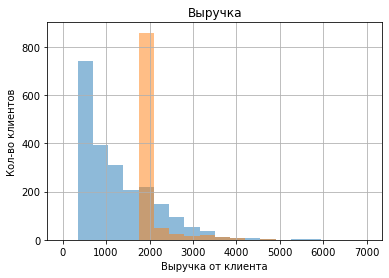

In [50]:
smart['total_revenue'].hist(bins=20, range=(0, 7000), alpha=0.5)
plt.title('Выручка')
plt.xlabel('Выручка от клиента')
plt.ylabel('Кол-во клиентов')

ultra['total_revenue'].hist(bins=20, range=(0, 7000), alpha=0.5)
plt.show()

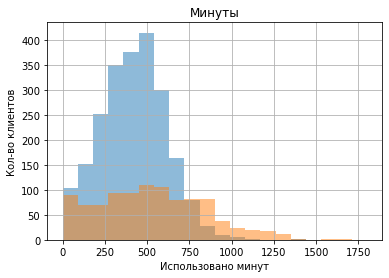

In [51]:
smart['duration'].hist(bins=20, range=(0, 1800), alpha=0.5)
plt.title('Минуты')
plt.xlabel('Использовано минут')
plt.ylabel('Кол-во клиентов')
ultra['duration'].hist(bins=20, range=(0, 1800), alpha=0.5)
plt.show()

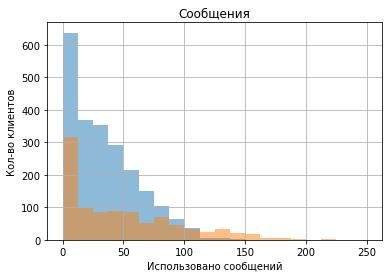

In [52]:
smart['message_count'].hist(bins=20, range=(0, 250), alpha=0.5)
plt.title('Сообщения')
plt.xlabel('Использовано сообщений')
plt.ylabel('Кол-во клиентов')
ultra['message_count'].hist(bins=20, range=(0, 250), alpha=0.5)
plt.show()

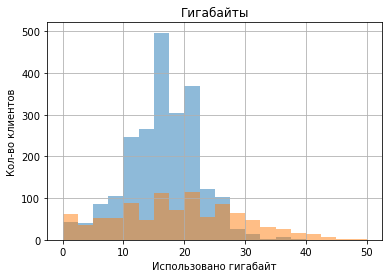

In [53]:
smart['gb_used'].hist(bins=20, range=(0, 50), alpha=0.5)
plt.title('Гигабайты')
plt.xlabel('Использовано гигабайт')
plt.ylabel('Кол-во клиентов')
ultra['gb_used'].hist(bins=20, range=(0, 50), alpha=0.5)
plt.show()

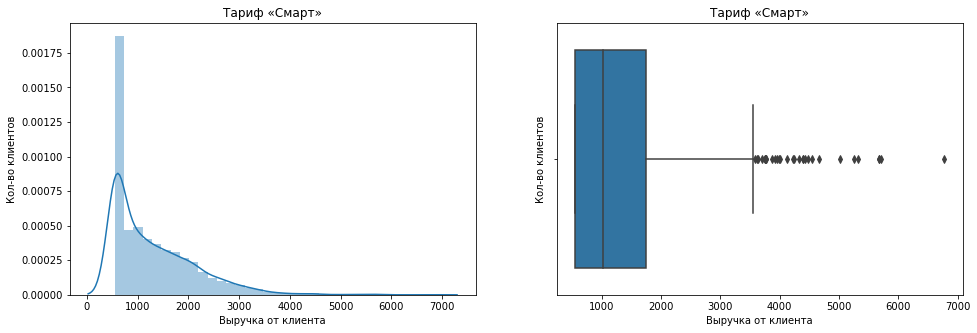

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(smart['total_revenue'], ax=axes[0])
sns.boxplot(smart['total_revenue'], ax=axes[1])
axes[0].set_title('Тариф «Смарт»')
axes[0].set_xlabel('Выручка от клиента')
axes[0].set_ylabel('Кол-во клиентов')
axes[1].set_title('Тариф «Смарт»')
axes[1].set_xlabel('Выручка от клиента')
axes[1].set_ylabel('Кол-во клиентов')
plt.show()

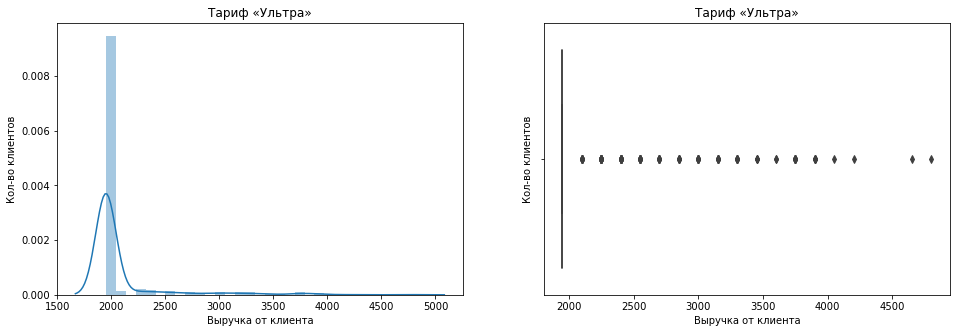

In [55]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
sns.distplot(ultra['total_revenue'], ax=axes[0])
sns.boxplot(ultra['total_revenue'], ax=axes[1])
axes[0].set_title('Тариф «Ультра»')
axes[0].set_xlabel('Выручка от клиента')
axes[0].set_ylabel('Кол-во клиентов')
axes[1].set_title('Тариф «Ультра»')
axes[1].set_xlabel('Выручка от клиента')
axes[1].set_ylabel('Кол-во клиентов')
plt.show()

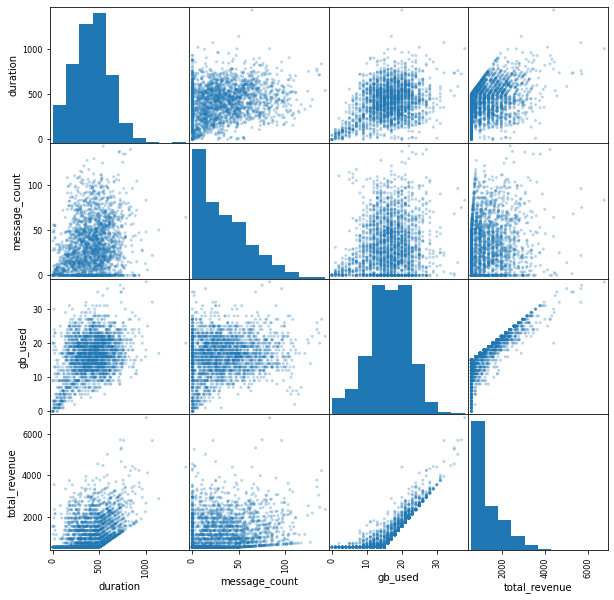

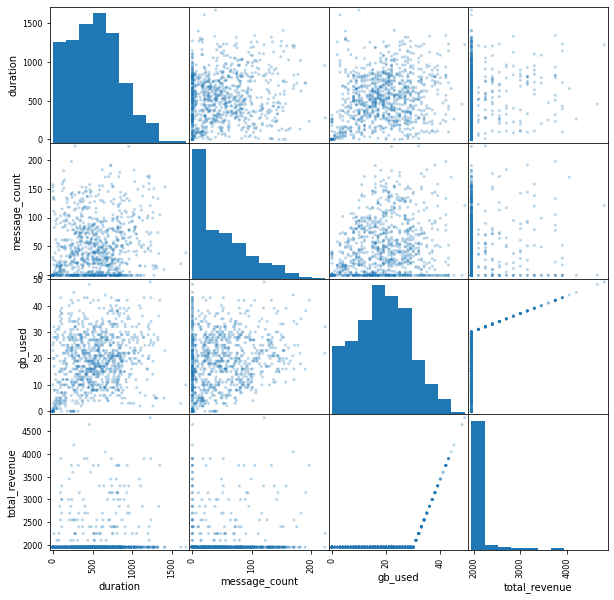

In [56]:
pd.plotting.scatter_matrix(smart[['duration', 'message_count', 'gb_used', 'total_revenue']], alpha = 0.3, figsize = (10,10))
pd.plotting.scatter_matrix(ultra[['duration', 'message_count', 'gb_used', 'total_revenue']], alpha = 0.3, figsize = (10,10))
plt.show()

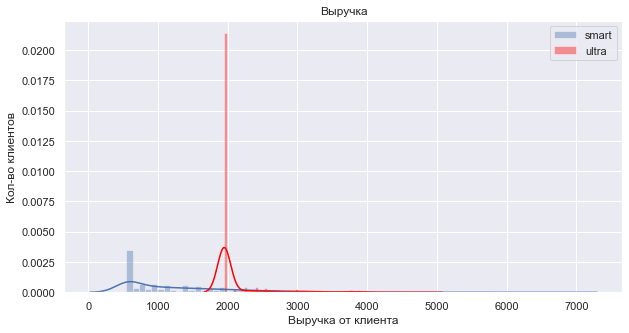

In [57]:
plt.figure(figsize=(10, 5))
sns.set()
sns.distplot(smart['total_revenue'], bins=70, label='smart')
sns.distplot(ultra['total_revenue'], bins=70, label='ultra', color='red')
plt.title('Выручка')
plt.xlabel('Выручка от клиента')
plt.ylabel('Кол-во клиентов')
plt.legend()
plt.show()

### Вывод

**Тариф «Смарт», ежемесячные средние показатели**

- Выручка всего, руб.: 1289
- Ежемесячная абонентская плата, руб.: 550
- Выручка сверх абонентской платы, руб.: 739 или +34 %
- Экономия митут разговора от лимита: -82 или -17 %
- Экономия сообщений от лимита: -17 или -33 %
- Перерасход гигабайт интернет-трафика от лимита: 1.27 или +9 %

**Тариф «Ультра», ежемесячные средние показатели**

- Выручка всего, руб.: 2067
- Ежемесячная абонентская плата, руб.: 1950
- Выручка сверх абонентской платы, руб.: 117 или +6 %
- Экономия митут разговора от лимита: -2474 или -83 %
- Экономия сообщений от лимита: -953 или -95 %
- Экономия гигабайт интернет-трафика от лимита: -11 или -37 %

**Выручка**
- Всплески в 500 и 2000  обусловлены потреблением услуг в пределах лимитов тарифов
- Распределение Пуассона

**Минуты разговора**
- Всплески в нулевых показателях обусловлены отсутствием потребления услуг
- Нормальное распределение

**Сообщения**
- Всплески в нулевых показателях обусловлены отсутствием потребления услуг
- Распределение Пуассона

**Гигабайты интернет-трафика**
- Всплески в нулевых показателях обусловлены отсутствием потребления услуг
- Нормальное распределение

## Проверка гипотез

### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

In [58]:
print('Средняя выручка тариф «Смарт», руб.:', smart['total_revenue'].describe()['mean'])
print('Средняя выручка тариф «Ультра», руб.:', ultra['total_revenue'].describe()['mean'])

Средняя выручка тариф «Смарт», руб.: 1288.5654708520178
Средняя выручка тариф «Ультра», руб.: 2066.683569979716


In [59]:
print('Количество строк с тарифом «Смарт»:', smart['total_revenue'].count())
print('Количество строк с тарифом «Ультра»:', ultra['total_revenue'].count())
print('Дисперсия выручки с тарифом «Смарт»:', np.var(smart['total_revenue']))
print('Дисперсия выручки с тарифом «Ультра»:', np.var(ultra['total_revenue']))

Количество строк с тарифом «Смарт»: 2230
Количество строк с тарифом «Ультра»: 986
Дисперсия выручки с тарифом «Смарт»: 670267.9685835231
Дисперсия выручки с тарифом «Ультра»: 139206.9526103763


Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам -scipy.stats.ttest_ind (array1, array2, equal_var). 

Так как выборка разного размера и дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind().

`Нулевая гипотеза` -  Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна

`Альтернативная гипотеза` - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [60]:
alpha = .05
results = st.ttest_ind(
    smart['total_revenue'], 
    ultra['total_revenue'],
    equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 4.8371938897843784e-250
Отвергаем нулевую гипотезу


Принимаем альтернативную гипотезу - Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Нулевая гипотеза отвергнута

### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [61]:
moscow = total_df[total_df.city == 'Москва']
moscow

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges,duration_per,rub_duration_per,duration_eco,message_count_per,rub_message_count_per,message_count_eco,gb_used_per,rub_gb_used_per,gb_used_eco,total_revenue
8,1001,41,Москва,Иван,Ежов,smart,11,0.0,11,50,15.0,500,550,200,3,3,430.0,0.0,18.0,550.0,0.0,0.0,70.0,0.0,0.0,50.0,3.0,600.0,0.0,1150.0
9,1001,41,Москва,Иван,Ежов,smart,12,0.0,11,50,15.0,500,550,200,3,3,414.0,0.0,14.0,550.0,0.0,0.0,86.0,0.0,0.0,50.0,0.0,0.0,1.0,550.0
17,1003,23,Москва,Белла,Белякова,ultra,8,0.0,8,1000,30.0,3000,1950,150,1,1,380.0,37.0,9.0,1950.0,0.0,0.0,2620.0,0.0,0.0,963.0,0.0,0.0,21.0,1950.0
18,1003,23,Москва,Белла,Белякова,ultra,9,0.0,8,1000,30.0,3000,1950,150,1,1,961.0,91.0,13.0,1950.0,0.0,0.0,2039.0,0.0,0.0,909.0,0.0,0.0,17.0,1950.0
19,1003,23,Москва,Белла,Белякова,ultra,10,0.0,8,1000,30.0,3000,1950,150,1,1,855.0,83.0,15.0,1950.0,0.0,0.0,2145.0,0.0,0.0,917.0,0.0,0.0,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3160,1490,30,Москва,Радомир,Алесин,smart,8,0.0,4,50,15.0,500,550,200,3,3,346.0,50.0,17.0,550.0,0.0,0.0,154.0,0.0,0.0,0.0,2.0,400.0,0.0,950.0
3161,1490,30,Москва,Радомир,Алесин,smart,9,0.0,4,50,15.0,500,550,200,3,3,322.0,48.0,15.0,550.0,0.0,0.0,178.0,0.0,0.0,2.0,0.0,0.0,0.0,550.0
3162,1490,30,Москва,Радомир,Алесин,smart,10,0.0,4,50,15.0,500,550,200,3,3,312.0,45.0,21.0,550.0,0.0,0.0,188.0,0.0,0.0,5.0,6.0,1200.0,0.0,1750.0
3163,1490,30,Москва,Радомир,Алесин,smart,11,0.0,4,50,15.0,500,550,200,3,3,282.0,47.0,19.0,550.0,0.0,0.0,218.0,0.0,0.0,3.0,4.0,800.0,0.0,1350.0


In [62]:
no_moscow = total_df[total_df.city != 'Москва']
no_moscow

,user_id,age,city,first_name,last_name,tariff,month,churn_month,reg_month,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration,message_count,gb_used,user_charges,duration_per,rub_duration_per,duration_eco,message_count_per,rub_message_count_per,message_count_eco,gb_used_per,rub_gb_used_per,gb_used_eco,total_revenue
0,1000,52,Краснодар,Рафаил,Верещагин,ultra,5,0.0,5,1000,30.0,3000,1950,150,1,1,159.0,22.0,3.0,1950.0,0.0,0.0,2841.0,0.0,0.0,978.0,0.0,0.0,27.0,1950.0
1,1000,52,Краснодар,Рафаил,Верещагин,ultra,6,0.0,5,1000,30.0,3000,1950,150,1,1,172.0,60.0,23.0,1950.0,0.0,0.0,2828.0,0.0,0.0,940.0,0.0,0.0,7.0,1950.0
2,1000,52,Краснодар,Рафаил,Верещагин,ultra,7,0.0,5,1000,30.0,3000,1950,150,1,1,340.0,75.0,14.0,1950.0,0.0,0.0,2660.0,0.0,0.0,925.0,0.0,0.0,16.0,1950.0
3,1000,52,Краснодар,Рафаил,Верещагин,ultra,8,0.0,5,1000,30.0,3000,1950,150,1,1,408.0,81.0,14.0,1950.0,0.0,0.0,2592.0,0.0,0.0,919.0,0.0,0.0,16.0,1950.0
4,1000,52,Краснодар,Рафаил,Верещагин,ultra,9,0.0,5,1000,30.0,3000,1950,150,1,1,466.0,57.0,15.0,1950.0,0.0,0.0,2534.0,0.0,0.0,943.0,0.0,0.0,15.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1498,68,Владикавказ,Всеволод,Акимчин,smart,10,10.0,7,50,15.0,500,550,200,3,3,247.0,42.0,21.0,550.0,0.0,0.0,253.0,0.0,0.0,8.0,6.0,1200.0,0.0,1750.0
3212,1499,35,Пермь,Гектор,Корнилов,smart,9,0.0,9,50,15.0,500,550,200,3,3,70.0,11.0,2.0,550.0,0.0,0.0,430.0,0.0,0.0,39.0,0.0,0.0,13.0,550.0
3213,1499,35,Пермь,Гектор,Корнилов,smart,10,0.0,9,50,15.0,500,550,200,3,3,449.0,48.0,18.0,550.0,0.0,0.0,51.0,0.0,0.0,2.0,3.0,600.0,0.0,1150.0
3214,1499,35,Пермь,Гектор,Корнилов,smart,11,0.0,9,50,15.0,500,550,200,3,3,612.0,59.0,18.0,550.0,112.0,336.0,0.0,9.0,27.0,0.0,3.0,600.0,0.0,1513.0


In [63]:
print('Средняя выручка в Москве, руб.:', moscow['total_revenue'].describe()['mean'])
print('Средняя выручка в других регионах, руб.:', no_moscow['total_revenue'].describe()['mean'])

Средняя выручка в Москве, руб.: 1546.7135842880523
Средняя выручка в других регионах, руб.: 1522.5370441458733


In [64]:
print('Количество строк с данными из Москвы:', moscow['total_revenue'].count())
print('Количество строк с данными из других регионов:', no_moscow['total_revenue'].count())
print('Дисперсия выручки из Москвы:', np.var(moscow['total_revenue']))
print('Дисперсия выручки из других регионов:', np.var(no_moscow['total_revenue']))

Количество строк с данными из Москвы: 611
Количество строк с данными из других регионов: 2605
Дисперсия выручки из Москвы: 564710.7117467269
Дисперсия выручки из других регионов: 652816.3407582615


Используем специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам -scipy.stats.ttest_ind (array1, array2, equal_var). 

Так как выборка разного размера и дисперсии у генеральных совокупностей разные — укажем equal_var = False при вызове метода scipy.stats.ttest_ind().

`Нулевая гипотеза` -  Средняя выручка пользователей из Москвы равна выручки пользователей из других регионов

`Альтернативная гипотеза` - Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Уровень значимости для исследования выбирается до сбора данных и обычно устанавливается на уровне 5% - его и будем использовать.

In [65]:
alpha = .05
results = st.ttest_ind(
    moscow['total_revenue'], 
    no_moscow['total_revenue'],
    equal_var = False)

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.4810627636436644
Не получилось отвергнуть нулевую гипотезу


Подтверждаем нулевую гипотезу - Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

Альтернативная гипотеза отвергнута

### Вывод

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов

## Общий вывод

В  целях определения какой тариф приносит больше денег («Смарт» или «Ультра»), для дальнейшей корректировки  рекламного бюджета коммерческого департамента произведен анализ и объединение пяти баз данных:

- /datasets/calls.csv. - информация о звонках;
- /datasets/internet.csv. - информация об интернет-сессиях;
- /datasets/messages.csv. - информация о сообщениях;
- /datasets/tariffs.csv. - информация о тарифах;
- /datasets/users.csv. - информация о пользователях.

В процессе объединения баз данных произведены дополнительные расчеты, которые позволяют судить о том что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются, а средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.

Биллинговые системы используемые операторами мобильной связи являются сертифицированным программным обеспечением, которые ведут учет в разрезе клиентов (минуты, смс, Гб).  
На основании данных биллинговых систем ведется бухгалтерский и налоговый учет.
В биллинговых системах возможны ошибочные начисления/не начисления по клиентам, но допущенные ошибки исправляются в следующем месяце, при работе с дебеторской задолженностью. 
Нулевые значения по минутам, сообщениям и интернет-трафику не являются аномалиями и выбросами.

Рекламный бюджет целесообразней направить на продвижение тарифа «Ультра». Клиенты тарифа «Смарт» выходят за рамки лимитов (минуты, смс, Гб) чаще и больше чем клиенты тарифа «Ультра», но средний чек на 60 % выше по клиентам тарифа «Ультра». Кроме того не использованные емкости по передаче данных клиентами по тарифу «Ультра» (минут – 83%, смс-95%, Гб-37%) позволяют продавать услугу без дополнительных капитальных вложений и операционных расходов, т.е. затраты только на рекламу, все остальное прибыль.     

**Тариф «Смарт», ежемесячные средние показатели**

- Выручка всего, руб.: 1289
- Ежемесячная абонентская плата, руб.: 550
- Выручка сверх абонентской платы, руб.: 739 или +34 %
- Экономия митут разговора от лимита: -82 или -17 %
- Экономия сообщений от лимита: -17 или -33 %
- Перерасход гигабайт интернет-трафика от лимита: 1.27 или +9 %

**Тариф «Ультра», ежемесячные средние показатели**

- Выручка всего, руб.: 2067
- Ежемесячная абонентская плата, руб.: 1950
- Выручка сверх абонентской платы, руб.: 117 или +6 %
- Экономия митут разговора от лимита: -2474 или -83 %
- Экономия сообщений от лимита: -953 или -95 %
- Экономия гигабайт интернет-трафика от лимита: -11 или -37 %